In [1]:
import pandas as pd
import sqlite3

In [3]:
conn = sqlite3.connect("factbook.db")

q = "SELECT * FROM sqlite_master WHERE type = 'table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [4]:
q = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [5]:
q = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts"
pd.read_sql_query(q, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [6]:
q = "SELECT * FROM facts WHERE population = 0 OR population = 7256490011 ORDER BY population ASC"
pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000.0,None,0,NaN,NaN,NaN,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746
1,261,xx,World,None,NaN,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


Antartica does not have a native population, only wierd researchers like isbop so population 0 makes sense

World is likely an aggregate of everything. Lets check this

In [7]:
q = "SELECT SUM(population) FROM facts WHERE name <> 'World'"
pd.read_sql_query(q, conn)

,SUM(population)
0,7770482643


interesting, the sum of populations does not equate to the world population

In [9]:
q = "SELECT name, population FROM facts WHERE name <> 'World' ORDER BY population DESC"
pd.read_sql_query(q, conn)

,name,population
0,China,1.367485e+09
1,India,1.251696e+09
2,European Union,5.139494e+08
3,United States,3.213689e+08
4,Indonesia,2.559937e+08
5,Brazil,2.042598e+08
6,Pakistan,1.990858e+08
7,Nigeria,1.815621e+08
8,Bangladesh,1.689577e+08
9,Russia,1.424238e+08


EU also needs to be excluded from our sum all. Possibly others

In [12]:
q = "SELECT name, population FROM facts WHERE population > 0 and name NOT IN ('World', 'European Union') ORDER BY population DESC"
pd.read_sql_query(q, conn)

,name,population
0,China,1367485388
1,India,1251695584
2,United States,321368864
3,Indonesia,255993674
4,Brazil,204259812
5,Pakistan,199085847
6,Nigeria,181562056
7,Bangladesh,168957745
8,Russia,142423773
9,Japan,126919659


In [11]:
q = "SELECT SUM(population) FROM facts WHERE name Not IN ('World', 'European Union')"
pd.read_sql_query(q, conn)

,SUM(population)
0,7256533198


7256490011 getting closer

In [13]:
7256533198-7256490011

43187

In [14]:
q = "SELECT name, population FROM facts WHERE population > 0 AND population <= 43187 AND name NOT IN ('World', 'European Union') ORDER BY population DESC"
pd.read_sql_query(q, conn)

,name,population
0,Sint Maarten,39689
1,Liechtenstein,37624
2,British Virgin Islands,33454
3,San Marino,33020
4,Saint Martin,31754
5,Monaco,30535
6,Gibraltar,29258
7,Palau,21265
8,Anguilla,16418
9,Akrotiri,15700


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
q = "SELECT * FROM facts WHERE population > 0 AND name NOT IN ('World', 'European Union')"
MyData = pd.read_sql_query(q, conn)
MyData.head()

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748.0,27398.0,1350.0,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468.0,468.0,0.0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


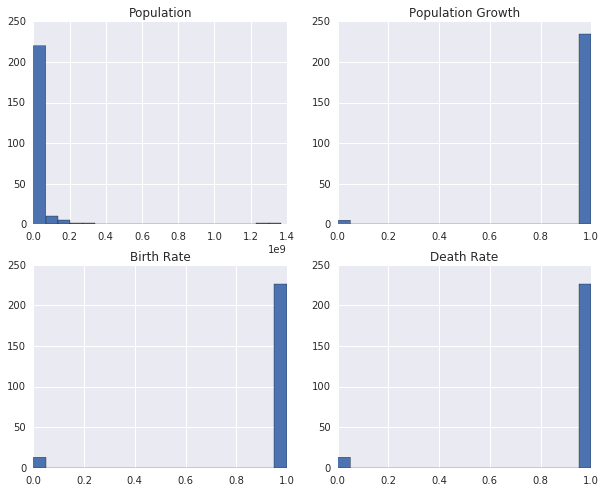

In [44]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(2,2,1)
ax1 = plt.hist(MyData['population'],20)
ax1 = plt.title("Population")

ax2 = fig.add_subplot(2,2,2)
ax2 = plt.hist(MyData['population_growth']>=0,20)
ax2 = plt.title("Population Growth")

ax3 = fig.add_subplot(2,2,3)
ax3= plt.hist(MyData['birth_rate']>=0,20)
ax3 = plt.title("Birth Rate")

ax4 = fig.add_subplot(2,2,4)
ax4= plt.hist(MyData['death_rate']>=0,20)
ax4 = plt.title("Death Rate")

plt.show()

#### Population Observations
Lots of small island nations vs a fewer much bigger countries
